<a href="https://colab.research.google.com/github/dominiksakic/NETworkingMay/blob/main/01_linear_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),\
                     np.ones((num_samples_per_class, 1), dtype="float32")))

print(f"Input shape: {inputs.shape}")
print(f"Target shape: {targets.shape}")
print(f"Input example: {inputs[0]}")
print(f"Target example: {targets[0]}")

Input shape: (2000, 2)
Target shape: (2000, 1)
Input example: [0.823636  4.5427547]
Target example: [0.]


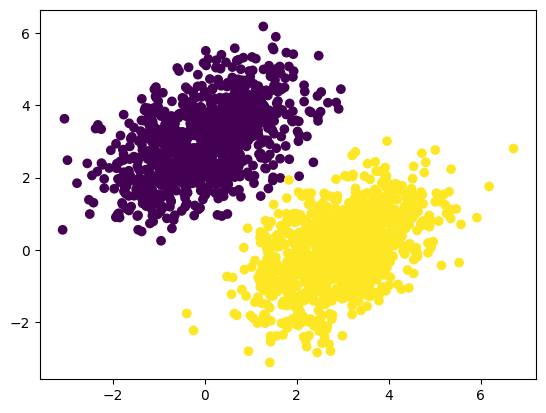

In [8]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])

In [10]:
import tensorflow as tf

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
print(f"W: {W}")
print(f"b: {b}")

W: <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.21508288],
       [0.5812595 ]], dtype=float32)>
b: <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [11]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [12]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [13]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

In [14]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.0975
Loss at step 1: 0.2106
Loss at step 2: 0.1149
Loss at step 3: 0.0986
Loss at step 4: 0.0913
Loss at step 5: 0.0855
Loss at step 6: 0.0803
Loss at step 7: 0.0755
Loss at step 8: 0.0712
Loss at step 9: 0.0672
Loss at step 10: 0.0636
Loss at step 11: 0.0603
Loss at step 12: 0.0572
Loss at step 13: 0.0545
Loss at step 14: 0.0519
Loss at step 15: 0.0496
Loss at step 16: 0.0475
Loss at step 17: 0.0456
Loss at step 18: 0.0438
Loss at step 19: 0.0422
Loss at step 20: 0.0408
Loss at step 21: 0.0394
Loss at step 22: 0.0382
Loss at step 23: 0.0371
Loss at step 24: 0.0360
Loss at step 25: 0.0351
Loss at step 26: 0.0343
Loss at step 27: 0.0335
Loss at step 28: 0.0328
Loss at step 29: 0.0321
Loss at step 30: 0.0315
Loss at step 31: 0.0310
Loss at step 32: 0.0305
Loss at step 33: 0.0300
Loss at step 34: 0.0296
Loss at step 35: 0.0292
Loss at step 36: 0.0289
Loss at step 37: 0.0286
Loss at step 38: 0.0283
Loss at step 39: 0.0280


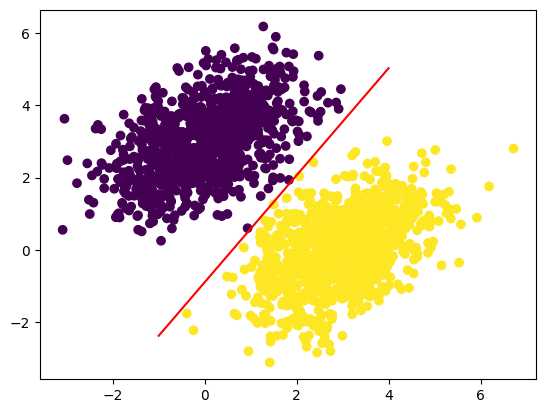

In [17]:
predictions = model(inputs)
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs [: ,1], c=predictions[:,0] > 0.5)